In [213]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings 
warnings.filterwarnings('ignore')

In [214]:
df = pd.read_csv('Car Sale.csv')

In [215]:
"""
Q1) What is the average selling price of cars for each dealer, and how does it compare across different dealers?
Answer-
"""
df

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23901,C_CND_023902,12/31/2023,Martin,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Manual,Red,12000,60504-7114,Passenger,8583598,Pasco
23902,C_CND_023903,12/31/2023,Jimmy,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,06457-3834,Hardtop,7914229,Middletown
23903,C_CND_023904,12/31/2023,Emma,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,Manual,Red,21000,99301-3882,Sedan,7659127,Scottsdale
23904,C_CND_023905,12/31/2023,Victoire,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Auto,Black,31000,53546-9427,Passenger,6030764,Austin


In [216]:
df.dtypes

Car_id           object
Date             object
Customer Name    object
Gender           object
Annual Income     int64
Dealer_Name      object
Company          object
Model            object
Engine           object
Transmission     object
Color            object
Price ($)         int64
Dealer_No        object
Body Style       object
Phone             int64
Dealer_Region    object
dtype: object

In [217]:
dealer_avg_price = df.groupby('Dealer_Name')['Price ($)'].mean().sort_values(ascending=False)
print(dealer_avg_price)


Dealer_Name
U-Haul CO                                          28769.919006
Classic Chevy                                      28602.014446
Rabun Used Car Sales                               28527.536177
Iceberg Rentals                                    28522.958533
Enterprise Rent A Car                              28312.580800
Scrivener Performance Engineering                  28297.371589
Gartner Buick Hyundai Saab                         28247.621019
Saab-Belle Dodge                                   28190.139888
Capitol KIA                                        28189.703822
Race Car Help                                      28163.372706
Chrysler of Tri-Cities                             28123.091054
Star Enterprises Inc                               28113.055244
Suburban Ford                                      28112.206758
C & M Motors Inc                                   28111.755200
Tri-State Mack Inc                                 28095.562050
Pars Auto Sales             

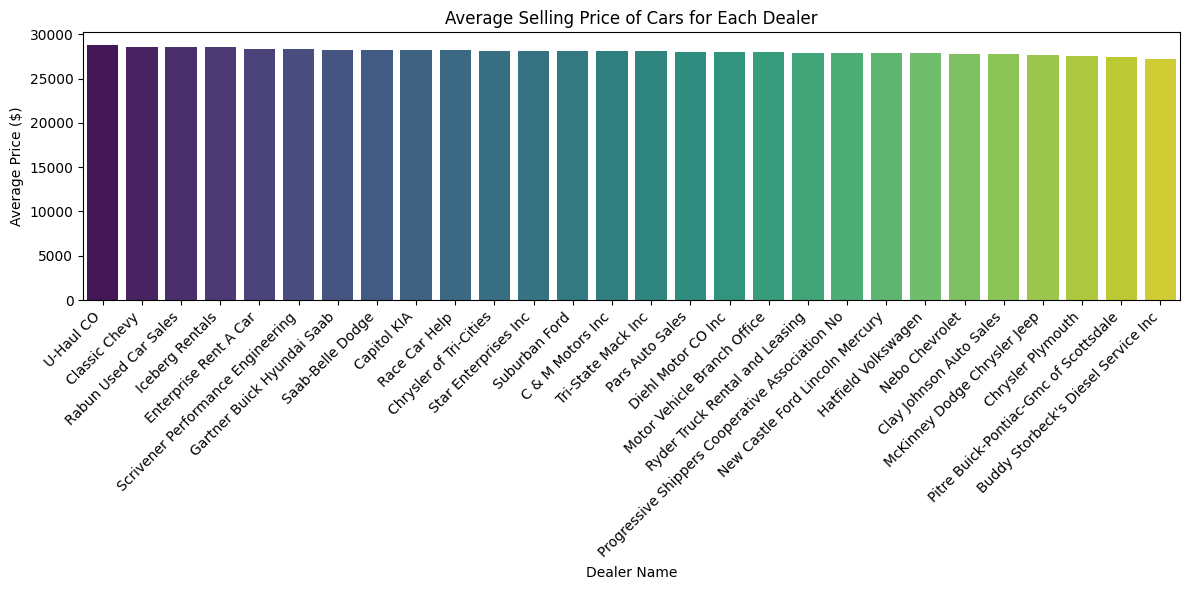

In [218]:
plt.figure(figsize=(12, 6))
sns.barplot(x=dealer_avg_price.index, y=dealer_avg_price.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Dealer Name')
plt.ylabel('Average Price ($)')
plt.title('Average Selling Price of Cars for Each Dealer')
plt.tight_layout()
plt.show()

In [219]:
"""
Q2) Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
Answer-
"""
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [220]:
price_variation = df.groupby('Company')['Price ($)'].std().sort_values(ascending=False)
price_variation

Company
Lincoln       19658.050211
Saab          19653.740089
Cadillac      19517.120220
Plymouth      19065.997338
Lexus         17852.923492
Buick         17142.232626
Mercury       16445.172195
Nissan        16214.264017
Saturn        15990.223671
Ford          15849.090227
Mercedes-B    15722.807459
Oldsmobile    15711.345857
Toyota        15367.131714
BMW           15065.578723
Pontiac       14348.963592
Infiniti      13696.332844
Chevrolet     13311.063223
Volvo         12933.790185
Subaru        12920.771620
Audi          12904.243867
Volkswagen    12527.124011
Mitsubishi    11671.343035
Chrysler      11583.286811
Dodge         11187.592085
Honda         11148.629062
Jaguar        10222.531533
Jeep           9459.834418
Acura          8183.046414
Porsche        5261.839206
Hyundai        3485.982649
Name: Price ($), dtype: float64

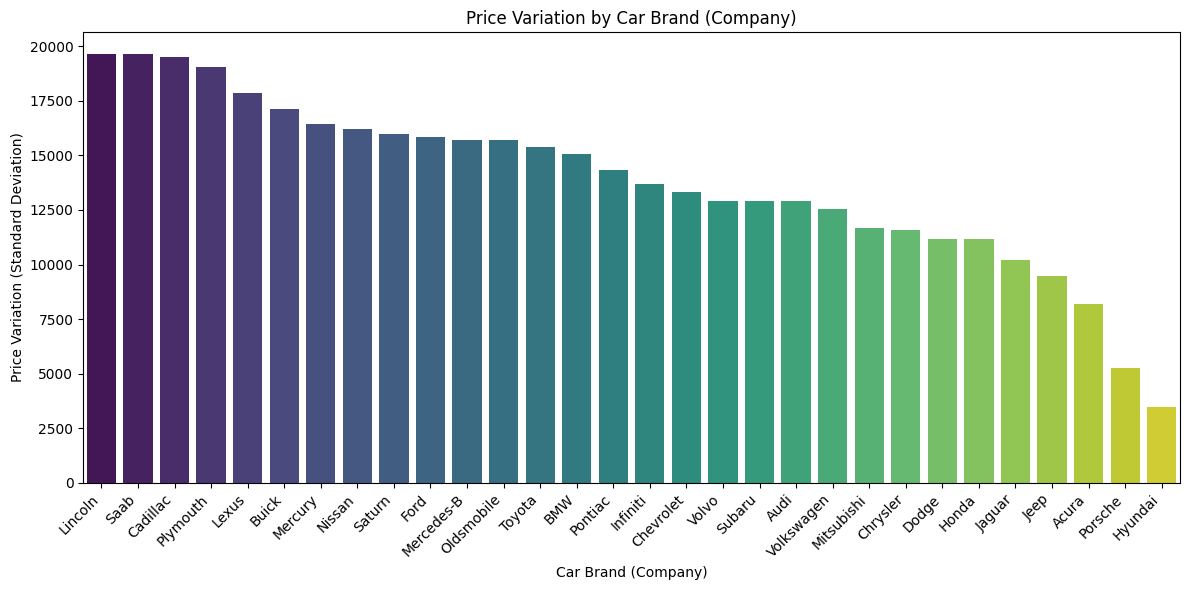

In [221]:
plt.figure(figsize=(12, 6))
sns.barplot(x=price_variation.index, y=price_variation.values, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Car Brand (Company)')
plt.ylabel('Price Variation (Standard Deviation)')
plt.title('Price Variation by Car Brand (Company)')
plt.tight_layout()
plt.show()


# insight - By looking at price variations, we can tell:
# Which brands are flexible with their offerings (luxury + budget).
# Which brands focus on a specific type of buyer (economical or luxury).

In [222]:
"""
Q3) What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
Answer-
"""
df.Transmission.unique()

array(['Auto', 'Manual'], dtype=object)

In [223]:
df.Transmission.value_counts()

Transmission
Auto      12571
Manual    11335
Name: count, dtype: int64

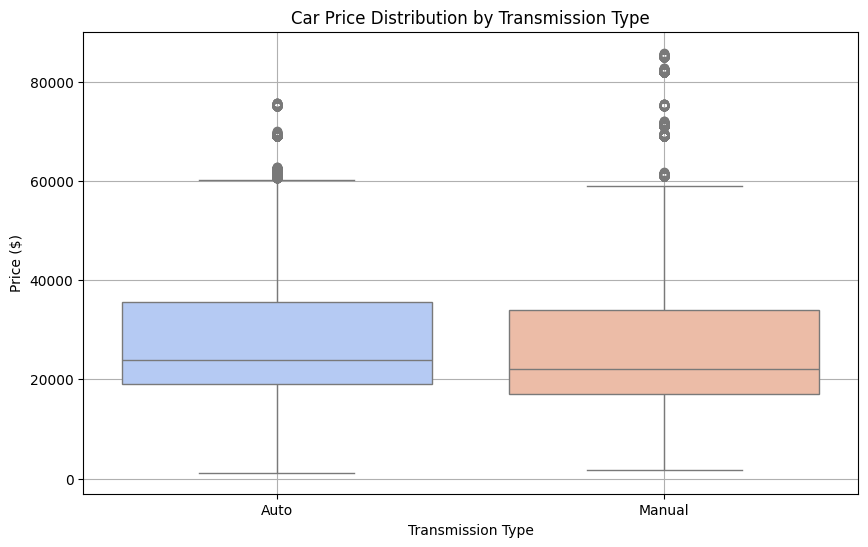

In [224]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Transmission', y='Price ($)', data=df, palette='coolwarm')

plt.xlabel('Transmission Type')
plt.ylabel('Price ($)')
plt.title('Car Price Distribution by Transmission Type')
plt.grid()
plt.show()

In [225]:
"""
Q4) What is the distribution of car prices across different regions?
Answer-
"""
df.Dealer_Region.unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

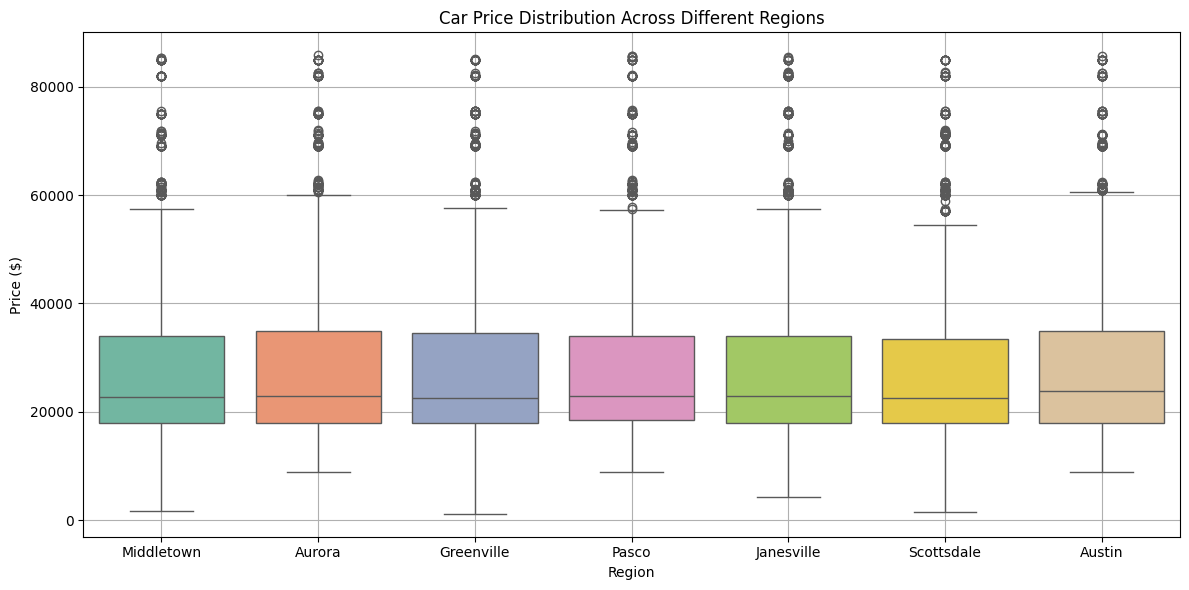

In [226]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df, palette='Set2')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.title('Car Price Distribution Across Different Regions')
plt.grid()
plt.tight_layout()
plt.show()

In [227]:
"""
Q5) What is the distribution of cars based on body styles?
Answer-
"""
body_style_counts = df['Body Style'].value_counts()
body_style_counts

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64

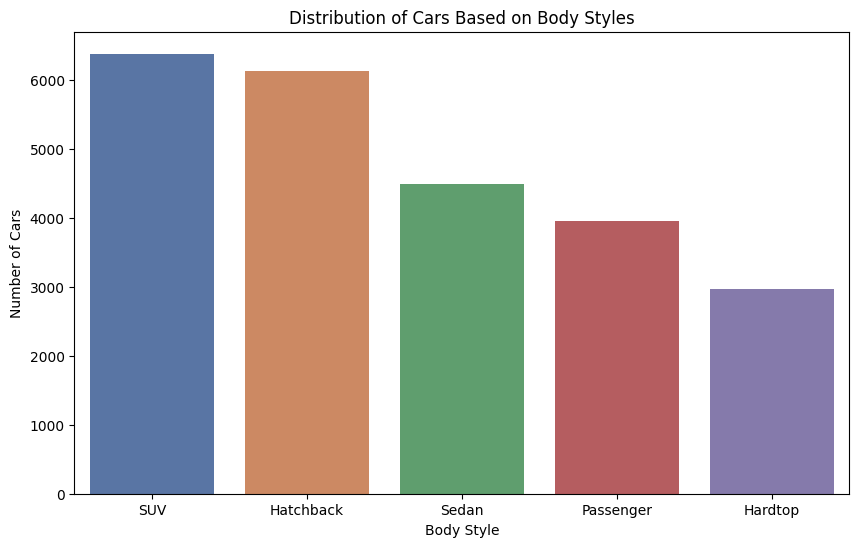

In [228]:
plt.figure(figsize=(10, 6))
sns.barplot(x=body_style_counts.index, y=body_style_counts.values, palette='deep')
plt.xlabel('Body Style')
plt.ylabel('Number of Cars')
plt.title('Distribution of Cars Based on Body Styles')
plt.show()

In [229]:
"""
Q6) How does the average selling price of cars vary by customer gender and annual income?
Answer-
"""
# Create Income Brackets
income_bins = [0, 30000, 60000, 90000, 120000, 150000, float('inf')]
income_labels = ['<30k', '30k-60k', '60k-90k', '90k-120k', '120k-150k', '>150k']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# Group data by Gender and Income Bracket
grouped_data = df.groupby(['Gender', 'Income Bracket'])['Price ($)'].mean().reset_index()
grouped_data

,Gender,Income Bracket,Price ($)
0,Female,<30k,28132.038732
1,Female,30k-60k,NaN
2,Female,60k-90k,NaN
3,Female,90k-120k,46001.000000
4,Female,120k-150k,20000.000000
5,Female,>150k,28316.441814
6,Male,<30k,27816.302247
7,Male,30k-60k,NaN
8,Male,60k-90k,43000.000000
9,Male,90k-120k,NaN


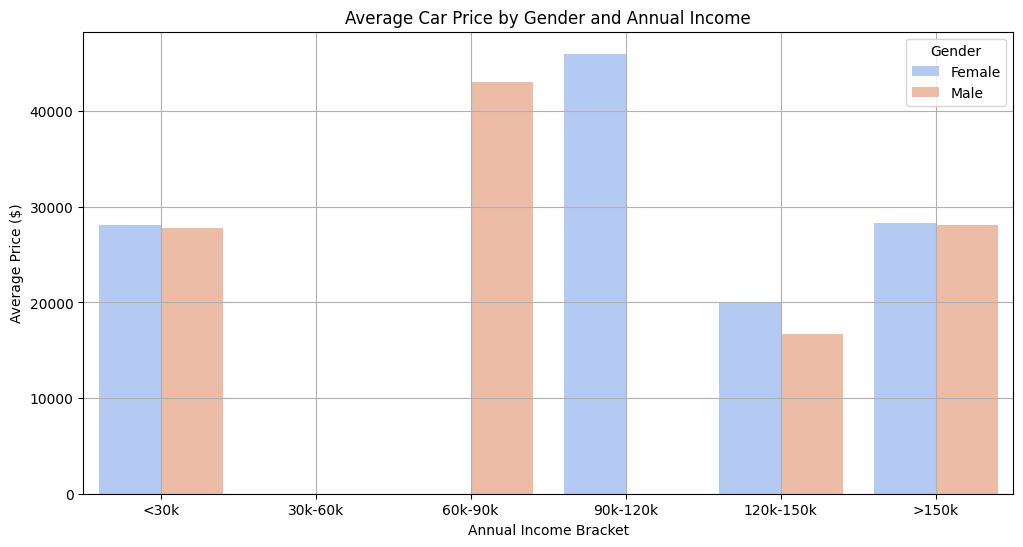

In [230]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped_data, x='Income Bracket', y='Price ($)', hue='Gender', palette='coolwarm')
plt.xlabel('Annual Income Bracket')
plt.ylabel('Average Price ($)')
plt.title('Average Car Price by Gender and Annual Income')
plt.grid()
plt.show()


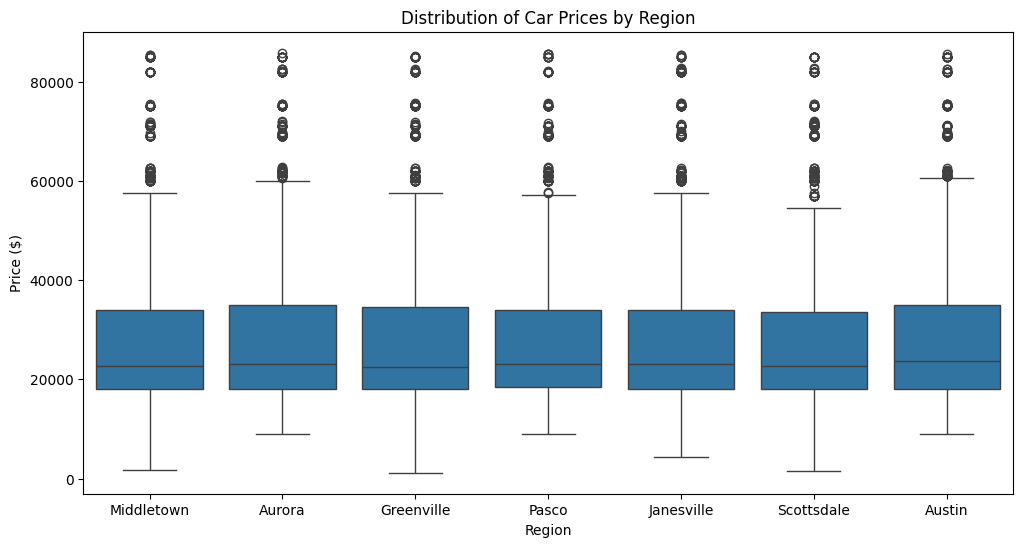

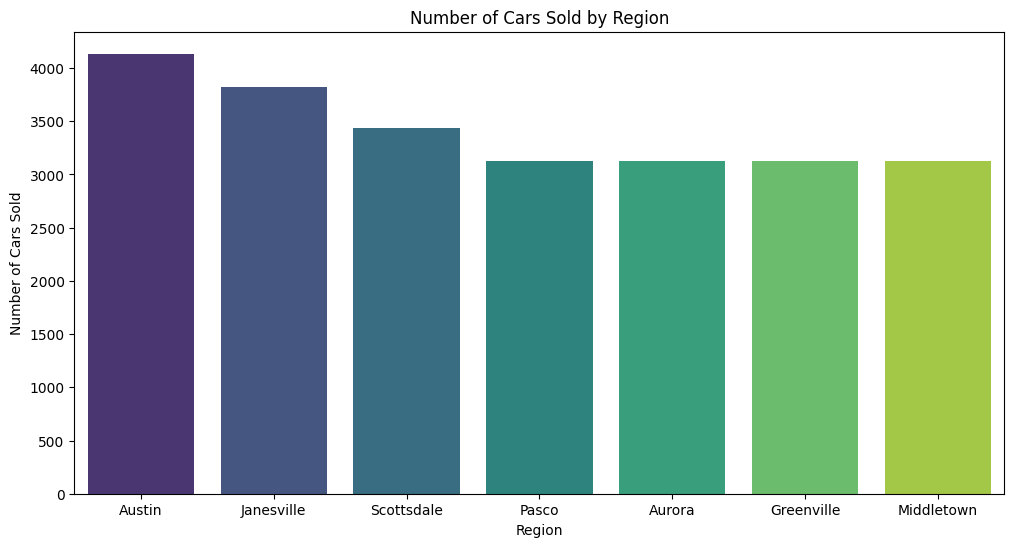

In [231]:
"""
Q7) What is the distribution of car prices by region, and how does the number of cars sold vary by region?
Answer-
"""
# 1. Distribution of Car Prices by Region (Boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Dealer_Region', y='Price ($)', data=df)
plt.title('Distribution of Car Prices by Region')
plt.xlabel('Region')
plt.ylabel('Price ($)')
plt.show()

# 2. Number of Cars Sold by Region (Bar Plot)
cars_sold_by_region = df['Dealer_Region'].value_counts()  # Count of cars sold per region
plt.figure(figsize=(12, 6))
sns.barplot(x=cars_sold_by_region.index, y=cars_sold_by_region.values, palette='viridis')
plt.title('Number of Cars Sold by Region')
plt.xlabel('Region')
plt.ylabel('Number of Cars Sold')
plt.show()

In [232]:
"""
Q8) How does the average car price differ between cars with different engine sizes?
Answer-
"""
avg_price_by_engine = df.groupby('Engine')['Price ($)'].mean().reset_index()
avg_price_by_engine


,Engine,Price ($)
0,DoubleÂ Overhead Camshaft,28248.525972
1,Overhead Camshaft,27914.710631


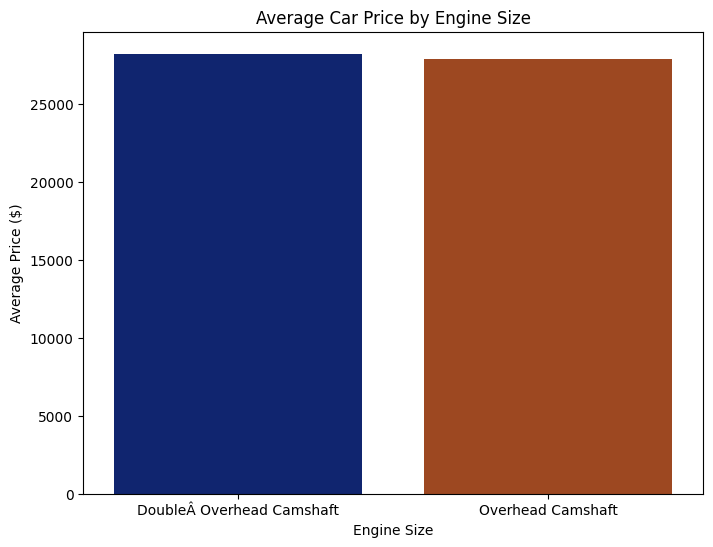

In [233]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Engine', y='Price ($)', data=avg_price_by_engine, palette='dark')
plt.title('Average Car Price by Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Average Price ($)')
plt.show()

In [234]:
"""
Q9) How do car prices vary based on the customer’s annual income bracket?
Answer-
"""
# 1. Create income brackets (e.g., Low, Medium, High)
income_bins = [0, 30000, 60000, 90000, 120000, float('inf')] 
income_labels = ['Low', 'Medium', 'High', 'Very High', 'Ultra High']
df['Income Bracket'] = pd.cut(df['Annual Income'], bins=income_bins, labels=income_labels)

# 2. Calculate the average car price by income bracket
avg_price_by_income = df.groupby('Income Bracket')['Price ($)'].mean().reset_index()


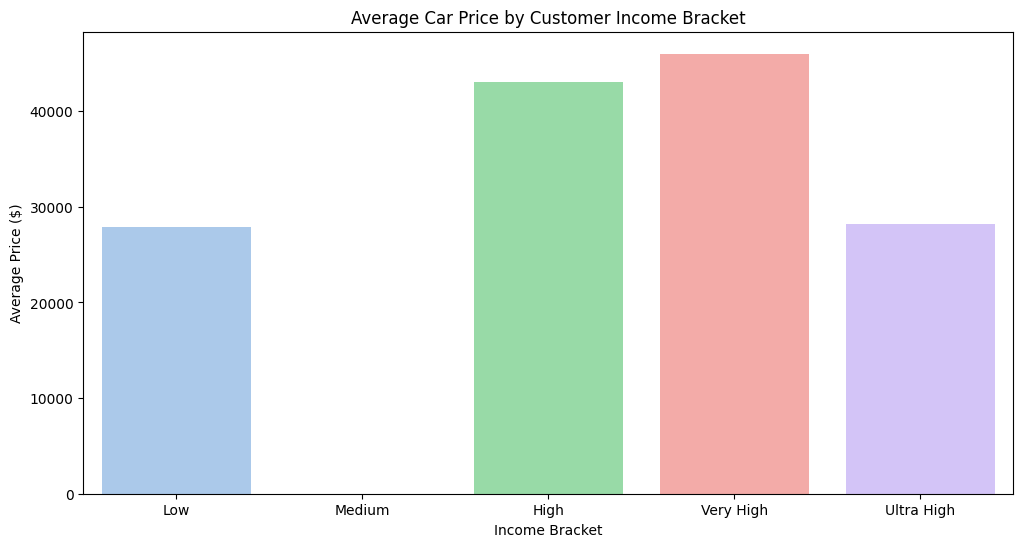

In [235]:

# 3. Visualize the average price by income bracket using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Income Bracket', y='Price ($)', data=avg_price_by_income, palette='pastel')
plt.title('Average Car Price by Customer Income Bracket')
plt.xlabel('Income Bracket')
plt.ylabel('Average Price ($)')
plt.show()

In [236]:
"""
Q10) What are the top 5 car models with the highest number of sales, and how does their price distribution look?
Answer-
"""
top_models = df['Model'].value_counts().head(5).index
top_models

Index(['Diamante', 'Prizm', 'Silhouette', 'Passat', 'Ram Pickup'], dtype='object', name='Model')

In [237]:
df_top_models = df[df['Model'].isin(top_models)]

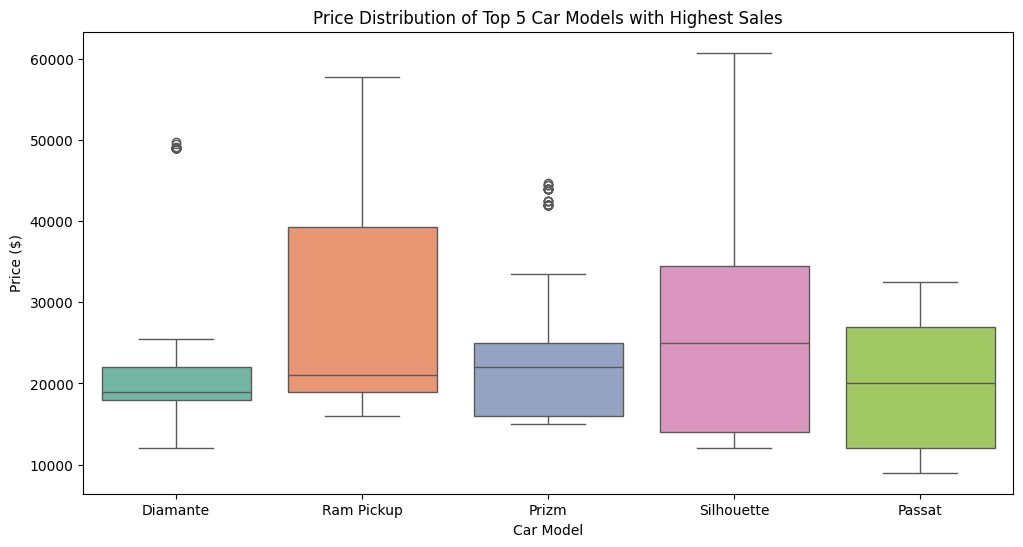

In [238]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Model', y='Price ($)', data=df_top_models, palette='Set2')
plt.title('Price Distribution of Top 5 Car Models with Highest Sales')
plt.xlabel('Car Model')
plt.ylabel('Price ($)')
plt.show()

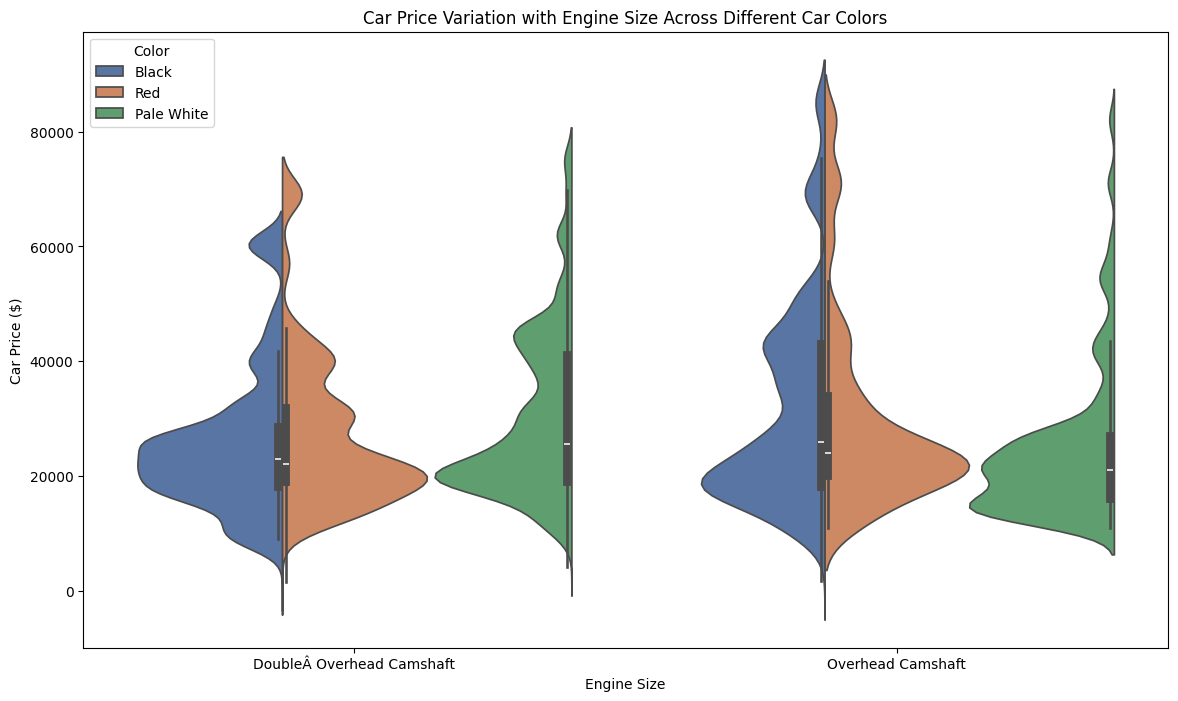

In [239]:
"""
Q11) How does car price vary with engine size across different car colors, and which colors have the highest price variation?
Answer-
"""
plt.figure(figsize=(14, 8))
sns.violinplot(x='Engine', y='Price ($)', hue='Color', data=df, split=True, palette='deep')
plt.title('Car Price Variation with Engine Size Across Different Car Colors')
plt.xlabel('Engine Size')
plt.ylabel('Car Price ($)')
plt.show()

In [240]:
price_variation_by_color = df.groupby('Color')['Price ($)'].std().reset_index()

# Sort by price variation
price_variation_by_color_sorted = price_variation_by_color.sort_values('Price ($)', ascending=False)

# Display the top colors with the highest price variation
print(price_variation_by_color_sorted)

        Color     Price ($)
2         Red  15519.360962
0       Black  15286.065976
1  Pale White  14077.346859


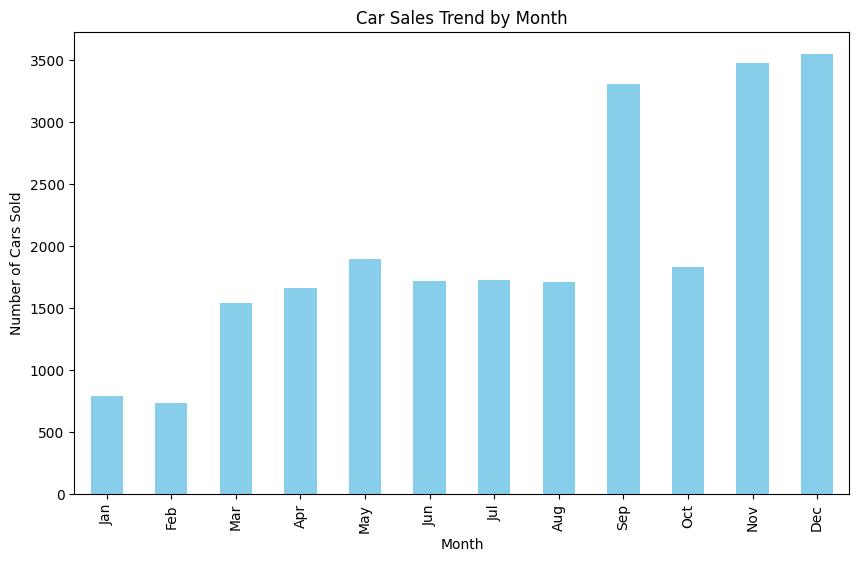

In [241]:
"""
Q12) Is there any seasonal trend in car sales based on the date of sale?
Answer-
"""
# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# 1. Extract the month or season from the 'Date' column
df['Month'] = df['Date'].dt.month

# 2. Group by month and count the number of cars sold
sales_by_month = df.groupby('Month')['Car_id'].count()

# 3. Plot the number of cars sold by month to identify seasonal trends
plt.figure(figsize=(10, 6))
sales_by_month.plot(kind='bar', color='skyblue')
plt.title('Car Sales Trend by Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

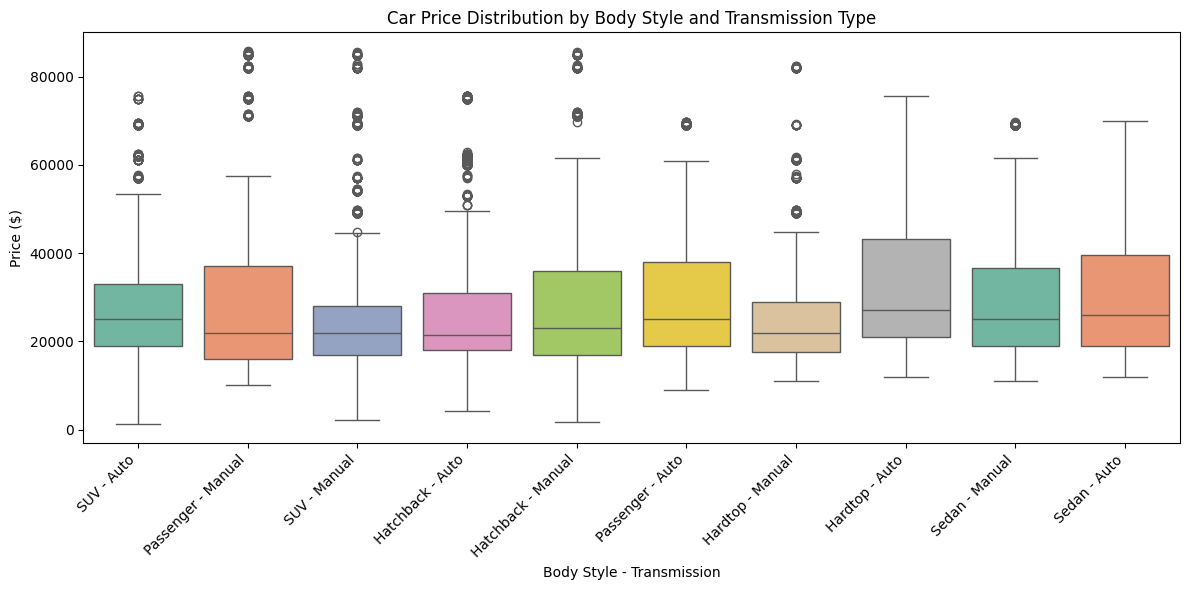

In [242]:
"""
Q13) How does the car price distribution change when considering different combinations of body style and transmission type?
Answer-
"""
# Check for missing values and drop rows with missing values in 'Price', 'Body Style', or 'Transmission'
df = df.dropna(subset=['Price ($)', 'Body Style', 'Transmission'])

# 1. Create a combination of 'Body Style' and 'Transmission'
df['Body_Transmission'] = df['Body Style'] + ' - ' + df['Transmission']

# 2. Plot the distribution of car prices for each combination of Body Style and Transmission Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Body_Transmission', y='Price ($)', data=df, palette='Set2')

# Customize the plot
plt.title('Car Price Distribution by Body Style and Transmission Type')
plt.xlabel('Body Style - Transmission')
plt.ylabel('Price ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [253]:
"""
Q14) What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?
Answer-
"""
df['Engine'] = df['Engine'].map({'DoubleÂ\xa0Overhead Camshaft': 1, 'Overhead Camshaft': 0})

correlation_matrix = df[['Price ($)', 'Engine', 'Annual Income']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               Price ($)    Engine  Annual Income
Price ($)       1.000000  0.011271       0.012065
Engine          0.011271  1.000000       0.006598
Annual Income   0.012065  0.006598       1.000000


In [254]:
df.Engine.unique()

array([1, 0])

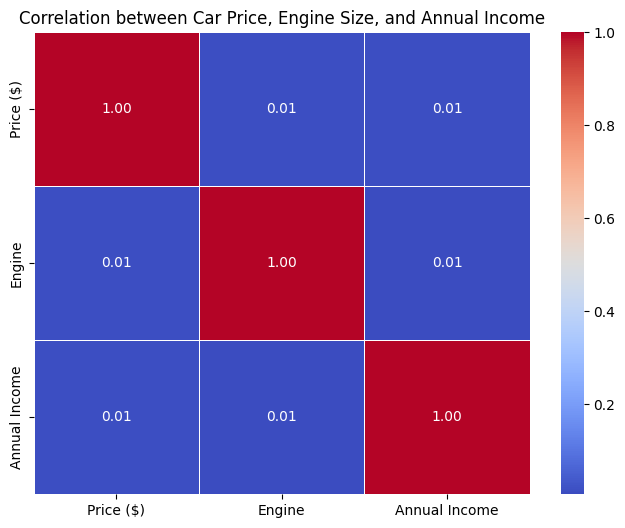

In [255]:
# 2. Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Car Price, Engine Size, and Annual Income')
plt.show()

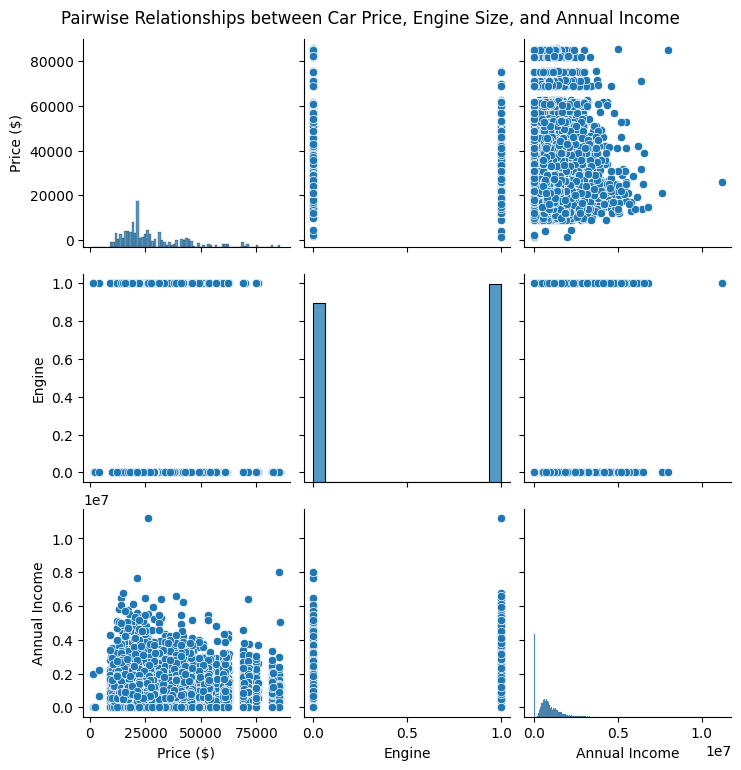

In [256]:
# 3. Visualize pairwise relationships using pairplot
sns.pairplot(df[['Price ($)', 'Engine', 'Annual Income']])
plt.suptitle('Pairwise Relationships between Car Price, Engine Size, and Annual Income', y=1.02)
plt.show()

In [257]:
"""
Q15) How does the average car price vary across different car models and engine types?
Answer-
"""
average_price_by_model_engine = df.groupby(['Model', 'Engine'])['Price ($)'].mean().reset_index()
average_price_by_model_engine

,Model,Engine,Price ($)
0,3-Sep,1,37986.380117
1,3000GT,0,21770.659864
2,3000GT,1,22764.326923
3,300M,1,21394.888889
4,323i,0,21038.162162
...,...,...,...
256,Windstar,1,25145.636364
257,Wrangler,0,18742.942029
258,Wrangler,1,21145.294737
259,Xterra,0,31072.500000


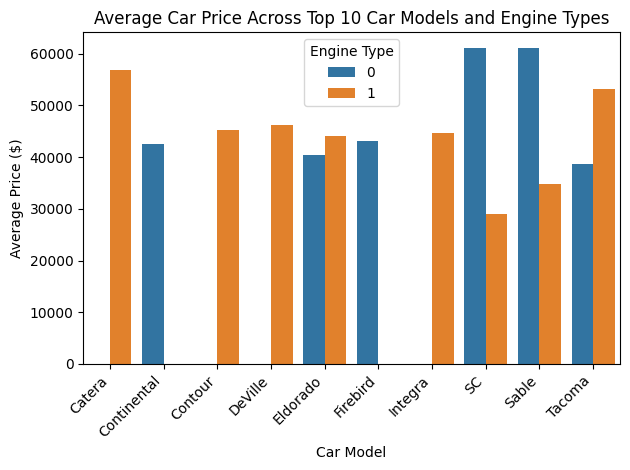

In [262]:

# Limit to top N models based on average price (adjust N as needed)
top_n_models = average_price_by_model_engine.groupby('Model')['Price ($)'].mean().nlargest(10).index
filtered_data = average_price_by_model_engine[average_price_by_model_engine['Model'].isin(top_n_models)]


sns.barplot(data=filtered_data, x='Model', y='Price ($)', hue='Engine')

plt.xticks(rotation=45, ha='right')
plt.title('Average Car Price Across Top 10 Car Models and Engine Types')
plt.xlabel('Car Model')
plt.ylabel('Average Price ($)')
plt.legend(title='Engine Type')

plt.tight_layout()  
plt.show()